In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , f1_score , recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\Fraud_check (2).csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
## rename the features in the data sets

data = data.rename(columns = {'Marital.Status':'marital_status' , 'Taxable.Income':'taxable_income' , 'City.Population':'city_population' , 'Work.Experience':'work_exp'})

In [5]:
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:


data['Risk'] = data['taxable_income'].apply(lambda x: 'Risky' if x<=30000 else 'Good')

In [7]:
data = data.drop(['taxable_income'] , axis = 1)

In [8]:
data = pd.get_dummies(data , columns = ['Undergrad' ,'marital_status' , 'Urban'] , drop_first = True)

In [9]:
## create a variable for the test and training data sets
x = data.drop(['Risk'] , axis =1)
y = data['Risk']

In [10]:
## training a testing data sets

x_train , x_test , y_train , y_test = train_test_split(x , y  , test_size = 0.20 , random_state = 42)

In [11]:
clf = DecisionTreeClassifier( criterion = 'entropy' , max_depth = 3)

In [12]:
clf.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
y_pred = clf.predict(x_test)

In [14]:
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [15]:
accuracy = accuracy_score(y_test , y_pred)

In [16]:
accuracy

0.775

In [17]:
conf_matrix = confusion_matrix(y_test , y_pred)

In [18]:
print(conf_matrix)

[[93  1]
 [26  0]]


In [19]:
f1_value = f1_score(y_test , y_pred , pos_label = 'Good')

In [20]:
f1_value

0.8732394366197184

In [21]:
precision_value = precision_score(y_test , y_pred , pos_label = 'Good')

In [22]:
precision_value

0.7815126050420168

In [23]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.99      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



[Text(0.5, 0.875, 'Good <= 0.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.625, 'Good <= 29.5\nentropy = 0.685\nsamples = 324\nvalue = [265, 59]'),
 Text(0.125, 0.375, 'Good <= 23.5\nentropy = 0.666\nsamples = 311\nvalue = [257, 54]'),
 Text(0.0625, 0.125, 'entropy = 0.715\nsamples = 244\nvalue = [196, 48]'),
 Text(0.1875, 0.125, 'entropy = 0.435\nsamples = 67\nvalue = [61, 6]'),
 Text(0.375, 0.375, 'Good <= 121060.5\nentropy = 0.961\nsamples = 13\nvalue = [8, 5]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(0.75, 0.625, 'Good <= 177179.5\nentropy = 0.811\nsamples = 156\nvalue = [117, 39]'),
 Text(0.625, 0.375, 'Good <= 175884.5\nentropy = 0.847\nsamples = 135\nvalue = [98, 37]'),
 Text(0.5625, 0.125, 'entropy = 0.831\nsamples = 133\nvalue = [98, 35]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'Good <= 192382.0\nentro

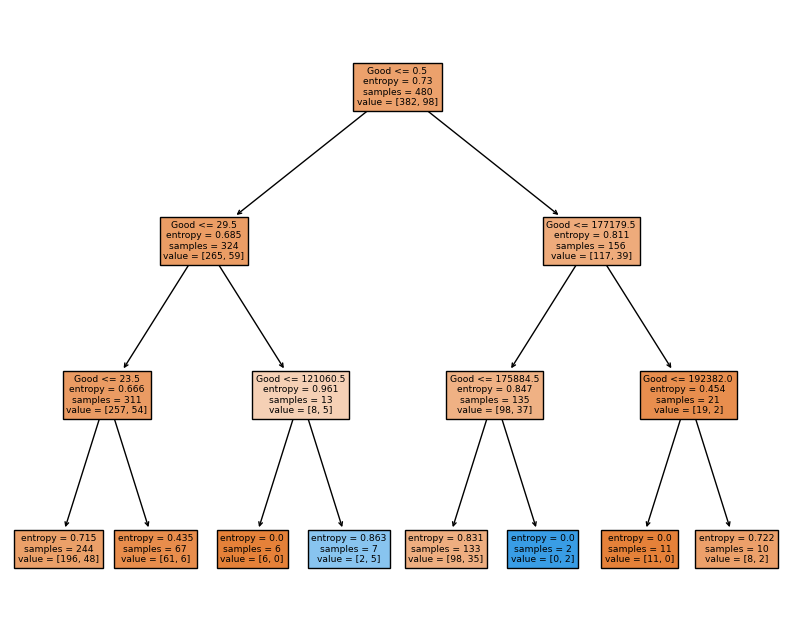

In [27]:
plt.figure(figsize = (10,8))
plot_tree(clf ,filled = True ,  feature_names = y)


In [28]:
## Decision tree Classifier fot the gini function



In [29]:
clf = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
clf.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred = clf.predict(x_test)

In [31]:
accuracy_value = accuracy_score(y_test , y_pred)

In [33]:
accuracy_value

0.775

In [34]:
prescision_value = precision_score(y_test , y_pred , pos_label = 'Good')

In [35]:
prescision_value

0.7815126050420168

In [37]:
classification_value = classification_report(y_test , y_pred)

In [39]:
print(classification_value)

              precision    recall  f1-score   support

        Good       0.78      0.99      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



[Text(0.5, 0.875, 'Good <= 0.5\ngini = 0.325\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.625, 'Good <= 29.5\ngini = 0.298\nsamples = 324\nvalue = [265, 59]'),
 Text(0.125, 0.375, 'Good <= 23.5\ngini = 0.287\nsamples = 311\nvalue = [257, 54]'),
 Text(0.0625, 0.125, 'gini = 0.316\nsamples = 244\nvalue = [196, 48]'),
 Text(0.1875, 0.125, 'gini = 0.163\nsamples = 67\nvalue = [61, 6]'),
 Text(0.375, 0.375, 'Good <= 121060.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.75, 0.625, 'Good <= 177179.5\ngini = 0.375\nsamples = 156\nvalue = [117, 39]'),
 Text(0.625, 0.375, 'Good <= 175884.5\ngini = 0.398\nsamples = 135\nvalue = [98, 37]'),
 Text(0.5625, 0.125, 'gini = 0.388\nsamples = 133\nvalue = [98, 35]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'Good <= 192382.0\ngini = 0.172\nsamples = 21\nvalue = [19,

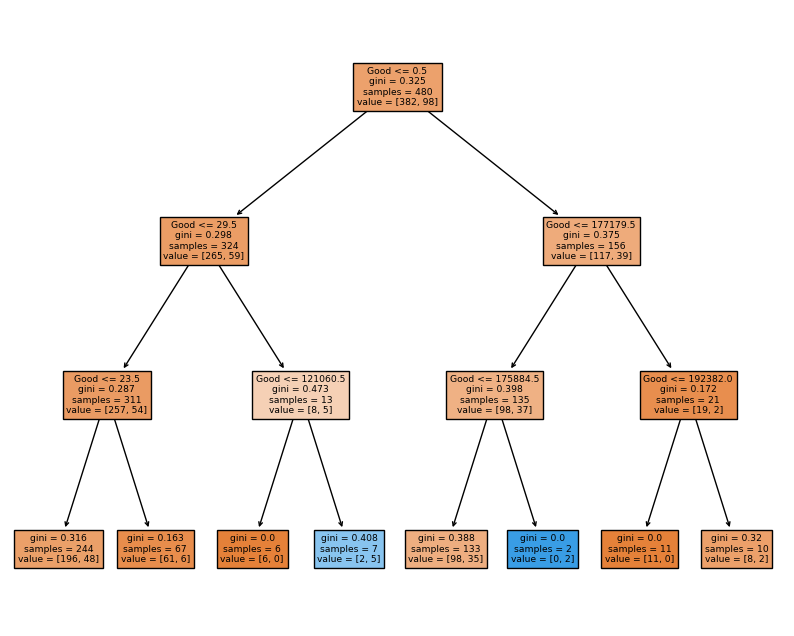

In [40]:
plt.figure(figsize = (10,8))
plot_tree(clf , filled = True , feature_names = y)